# IMPORT LIBRARIES

In [1]:
#data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf 
%matplotlib inline

# READ DATASET

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# DATA EXPLORATION

In [3]:
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (54808, 14)
Shape of test : (23490, 13)


In [4]:
train.describe()


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
train.employee_id.value_counts()

65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: employee_id, Length: 54808, dtype: int64

In [7]:
train.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [8]:
train.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [9]:
# 4.Education: education level of the employee.
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

It is categorical variable with 3 different categories: Below Secondary,Bachelor's & Master's & above. 70% of the employees have Bachelor's degree.

In [10]:
# 5.Gender: gender is a categorical variables with 2 categories: Male and Female.
train.gender.value_counts()   

m    38496
f    16312
Name: gender, dtype: int64

There are twice as many male employees in the company as compared to the female employees.

In [11]:
# 6. recruitment_channel: Channel of recruitment for employee contains 3 categories: sourcing, referred and other.
train.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [12]:
#7. no_of_trainings: no of other trainings the employee has completed in previous year on soft skills, technical skills etc.
train.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

Each employee has undergone atleast a training in the previous year.The no of trainings undergone varies from 1 to 10.

In [13]:
# 8. age: Age of the employee.
print("Age varies from: ",train.age.min(),'yrs to',train.age.max(),'yrs')

Age varies from:  20 yrs to 60 yrs


In [14]:
#9. previous_year_rating: Employee Rating for the previous year. It is a categorical variable as there are rated on a scale of 1 to 5.
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [15]:
#10. length_of_service : For how many years the employee has been working.
print("Average score ranges between: ",train.avg_training_score.min(),'to',train.avg_training_score.max())


Average score ranges between:  39 to 99


In [16]:
#11. KPIs_met >80% : It is a categorical variable with 2 categories where 1 indicates those employees whose Key Performance Indicators was greater than 80% and 0 represents the rest.
train['KPIs_met >80%'].value_counts()


0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

In [17]:
#12. awards_won: It is a categorical variable with 2 categories where 1 indicates a employee who has won an award and 0 represnts the rest.
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

Only 2.3% of the employees have won an award.

In [18]:
#13.avg_training_score: Average score in current training evaluations.
print("Average score ranges between: ",train.avg_training_score.min(),'to',train.avg_training_score.max())


Average score ranges between:  39 to 99


In [19]:
#14. is_promoted : This the target variable which helps in recommending if the employee is promoted with the help of all the above parameters.
#It is a categorical variable with 2 values making this is binary classification problem
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [20]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<AxesSubplot:>

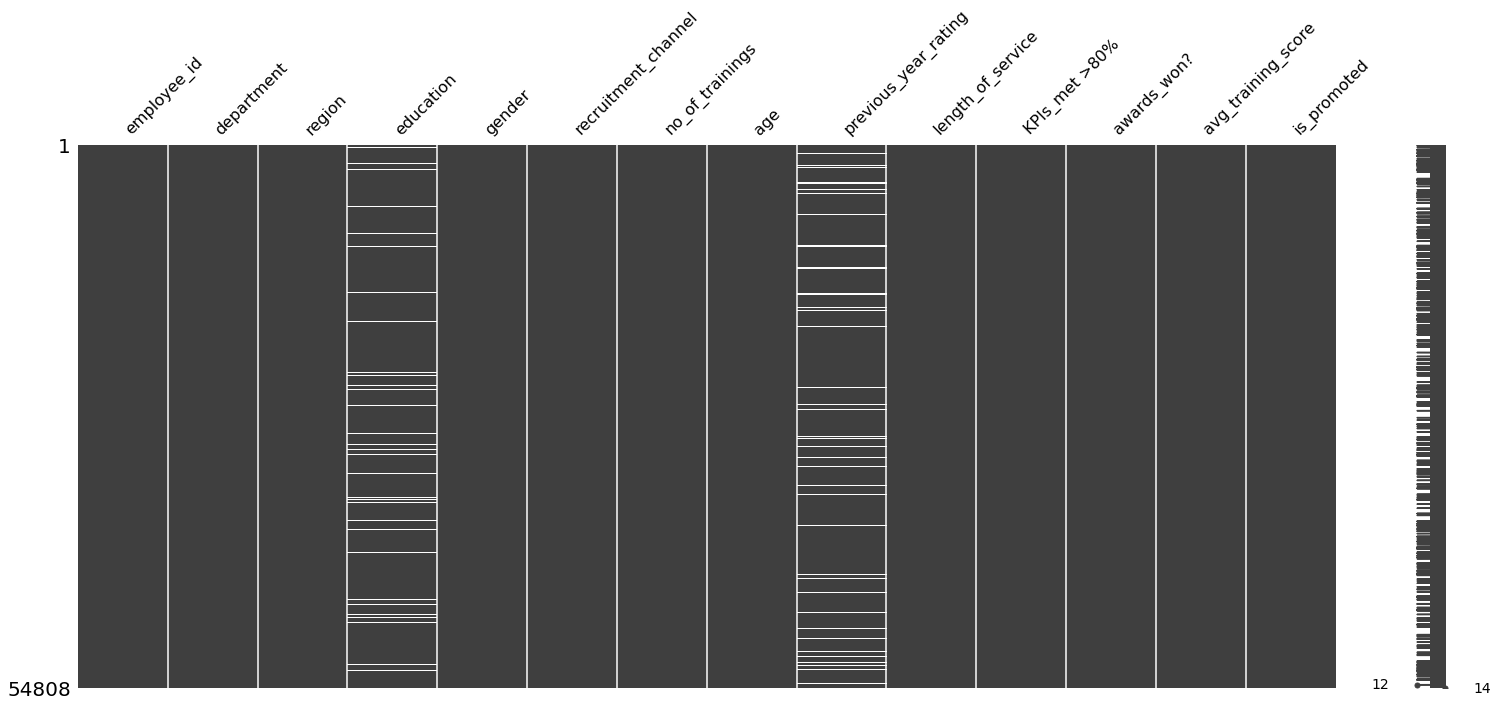

In [21]:
#### Visualizing the null values using missingo function

import missingno as msno
msno.matrix(train)

<AxesSubplot:>

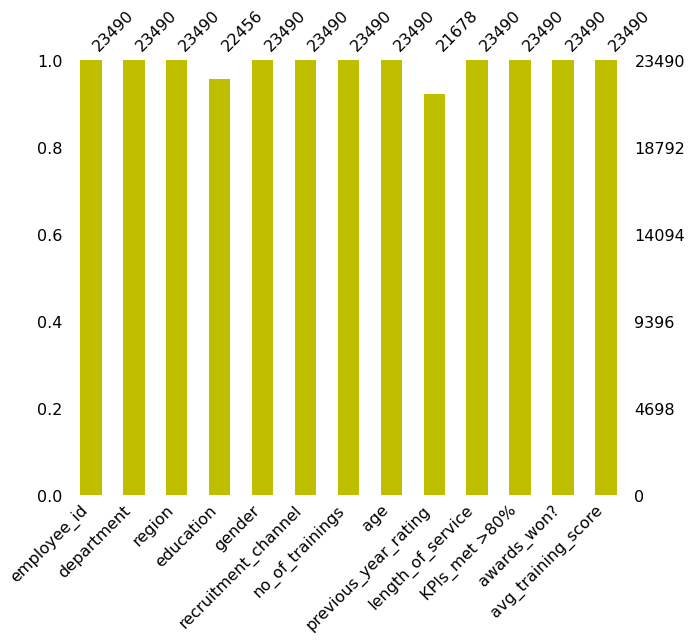

In [22]:
msno.bar(test, color = 'y', figsize = (10,8))  #### Check the missing values in test data

# Exploratory Data Analysis

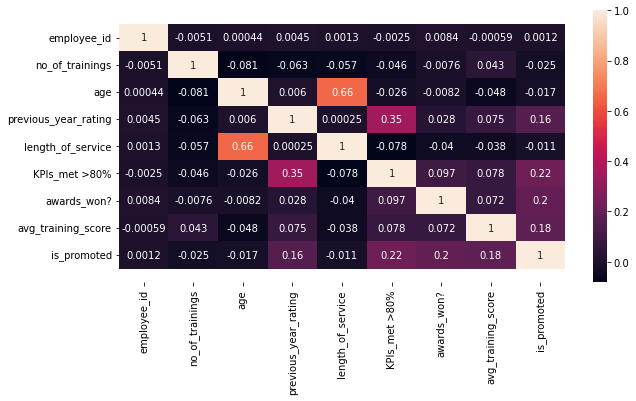

In [23]:
# Correlation matrix between numerical values
plt.figure(figsize=(10, 5))
cor = train.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The target variable is not significantly correlated with other variables.

The age variable is highly correlated with the length of service.

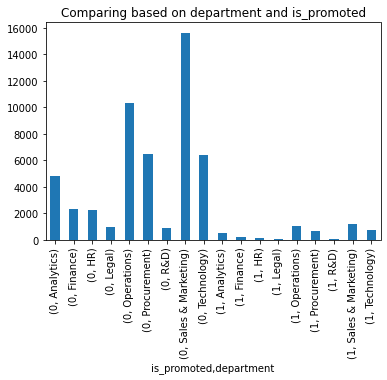

department
Analytics            10.968295
Finance               4.413025
HR                    2.913453
Legal                 1.135390
Operations           21.915167
Procurement          14.738646
R&D                   1.478149
Sales & Marketing    25.985433
Technology           16.452442
Name: employee_id, dtype: float64


In [24]:
#A bar plot of is_promoted by Department

train.groupby(['is_promoted','department'])['employee_id'].count().plot(kind = 'bar')
plt.title('Comparing based on department and is_promoted')
plt.show()

#percentages of employess from each department who are promoted
d = train[train['is_promoted'] == 1].groupby('department').count()['employee_id']
print((d / d.sum()) * 100)

The highest number of employees in the company were from Sales and Marketing and the highest %age of promoted employees are also from the same department.

After sales we can see that a significant number of employees have been promoted from Operations.

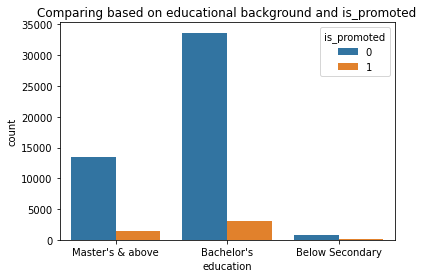

Bachelor's          66.168060
Master's & above    32.358117
Below Secondary      1.473823
Name: education, dtype: float64

In [25]:
# Employees with which educational background have been promoted the most?

sns.countplot(x = 'education', hue = 'is_promoted', data = train)
plt.title('Comparing based on educational background and is_promoted')
plt.show()

#print percentages of  Below Secondary,Bachelor's & Master's & above who are promoted
train[train['is_promoted'] == 1]['education'].value_counts(normalize = True) * 100

The highest number of employees in the company had completed Bachelor's education and the highest %age of promoted employees are also from the same educational background i.e 66%.

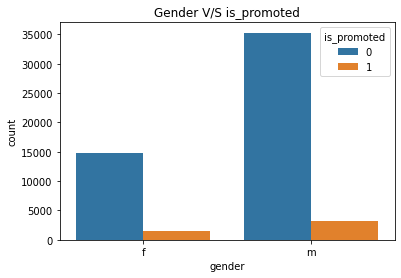

m    68.573265
f    31.426735
Name: gender, dtype: float64

In [26]:
# Gender V/S is_promoted

sns.countplot(x = 'gender', hue = 'is_promoted', data = train)
plt.title('Gender V/S is_promoted')
plt.show()

#percentages of females vs. males who are promoted
train[train['is_promoted'] == 1]['gender'].value_counts(normalize = True) * 100

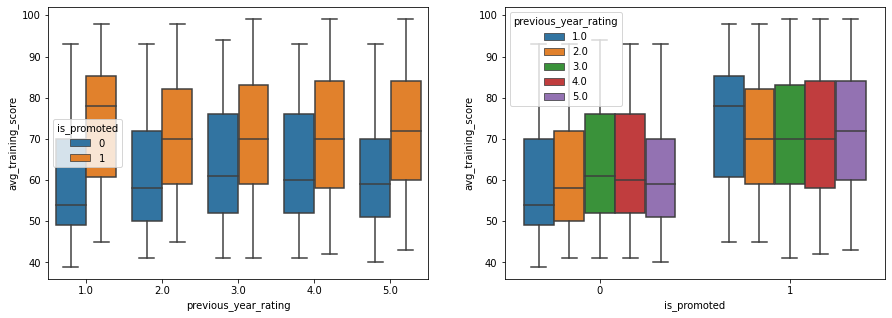

In [27]:
# create subplot plot
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# boxplot
sns.boxplot(x='previous_year_rating',y='avg_training_score',data=train,hue='is_promoted', ax = axes[0])
sns.boxplot(x='is_promoted',y='avg_training_score',data=train,hue='previous_year_rating', ax = axes[1])
plt.show()

From these boxplots we can clearly see that average training score has a significant impact on the promotion.

In each of the groups based on previous year rating the employee who has scored more in the training test has been promoted.

The employees who had the lowest previous have worked hard and scored greater score in the training and are the ones who have been promoted the most i.e the employees whose performance has increased from the previous year have been giving equal opportunities in promotion.

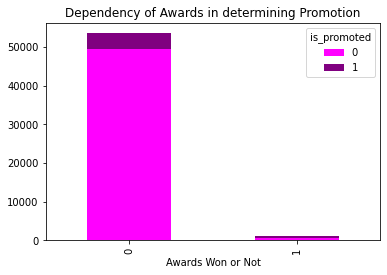

0    88.02485
1    11.97515
Name: awards_won?, dtype: float64

In [28]:
# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion')
plt.xlabel('Awards Won or Not')
plt.show()

train[train['is_promoted'] == 1]['awards_won?'].value_counts(normalize = True) * 100

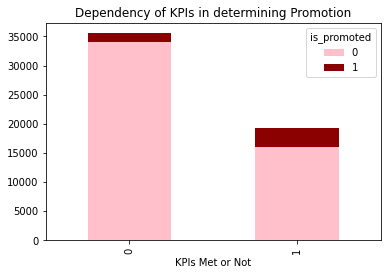

1    69.880034
0    30.119966
Name: KPIs_met >80%, dtype: float64


In [29]:
#dependency of KPIs with Promotion

data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion')
plt.xlabel('KPIs Met or Not')
plt.show()

print(train[train['is_promoted'] == 1]['KPIs_met >80%'].value_counts(normalize = True) * 100)

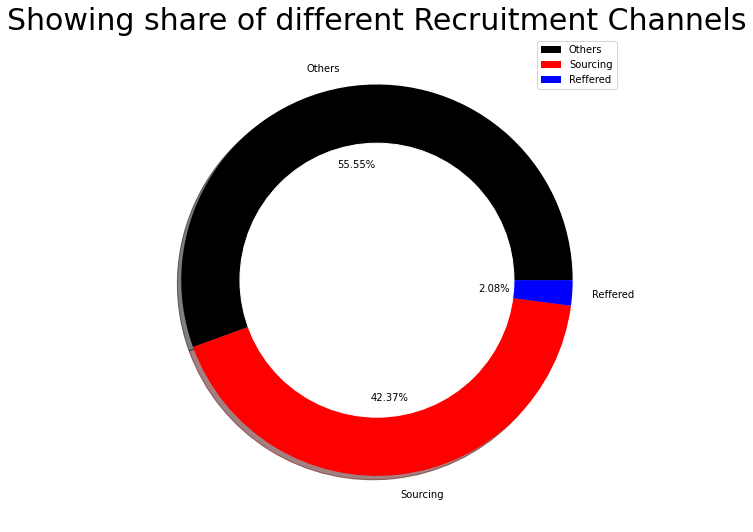

In [30]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [30446, 23220, 1142]
colors = ['black', 'red', 'blue']
labels = "Others", "Sourcing", "Reffered"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

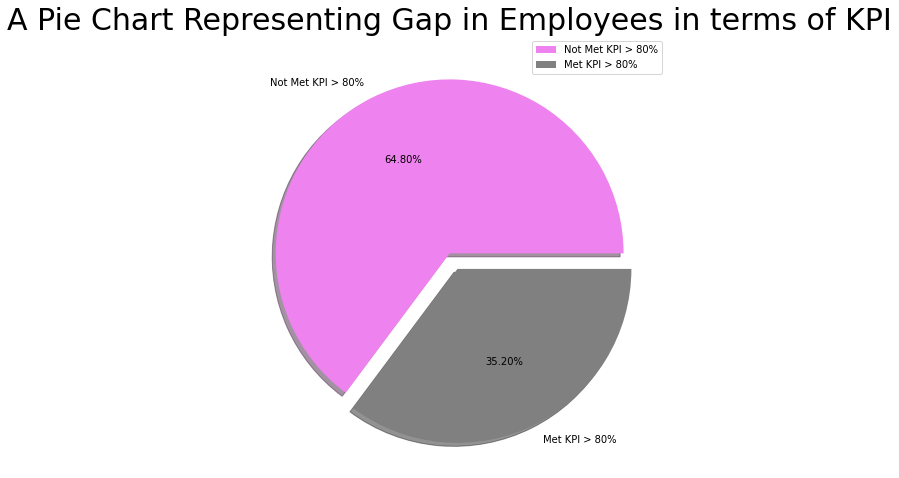

In [31]:
size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['violet', 'grey']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

# DATA PRE-PROCESSING

In [32]:
# combining the data for data prep

test['is_promoted']=np.nan
train['data']='train'
test['data']='test'
test=test[train.columns]

combined = pd.concat([train,test], sort = False , ignore_index= True)
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


In [33]:
#Missing values

combined.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [34]:
combined.education.value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [35]:
#filling in education with the maximum value(mode)

combined.education.fillna("Bachelor's",inplace=True)
combined.education.value_counts()

Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [36]:
combined.education.isna().sum()

0

In [37]:
combined.previous_year_rating.value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [38]:
#filling in previous_year_rating with the median

combined.previous_year_rating.fillna(combined.previous_year_rating.median(),inplace=True)
combined.previous_year_rating.value_counts()

3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [39]:
combined.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [40]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             78298 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  78298 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
 14  data                  78298 non-null  object 
dtypes: float64(2), int6

Encoding the data
Feature Hashing:
Feature hashing maps each category in a categorical feature to an integer within a pre-determined range. This output range is smaller than the input range so multiple categories may be mapped to the same integer. Feature hashing is very similar to one-hot encoding but with a control over the output dimensions.

To implement feature hashing in python we can use category_encoder, a library containing sklearn compabitable category encoders.

In [41]:
#Feature hashing region

unique_region = np.unique(combined[['region']])
print("Total unique regions:", len(unique_region))
print(unique_region)

Total unique regions: 34
['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']


In [42]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(combined['region'])
hashed_features = hashed_features.toarray()
hashed_features = pd.DataFrame(hashed_features)
print(hashed_features)
combined = pd.concat((combined, hashed_features),axis=1)

         0    1    2    3    4    5
0     -1.0  3.0  0.0  0.0  0.0  0.0
1     -1.0  3.0 -1.0  2.0  0.0  0.0
2     -1.0  2.0 -1.0  0.0  0.0  1.0
3      0.0  3.0 -1.0  1.0  0.0  0.0
4     -1.0  3.0  0.0  1.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...
78293 -1.0  3.0 -1.0  1.0  0.0  0.0
78294  0.0  3.0 -1.0  1.0  0.0  0.0
78295 -1.0  2.0  0.0  0.0  0.0  0.0
78296  0.0  2.0 -1.0  0.0  0.0  0.0
78297 -1.0  2.0  0.0  0.0  0.0  0.0

[78298 rows x 6 columns]


In [43]:
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [44]:
combined.drop('region',axis=1,inplace=True)

In [45]:
#encoding gender and education

combined['gender'] = combined['gender'].map( {'f': 0, 'm': 1} ).astype(int)  

combined['education'] = combined['education'].map( {'Below Secondary': 0, 'Bachelor\'s': 1, 'Master\'s & above': 2} ).astype(int)

In [46]:
combined.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,Sales & Marketing,2,0,sourcing,1,35,5.0,8,1,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,Operations,1,1,other,1,30,5.0,4,0,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,Sales & Marketing,1,1,sourcing,1,34,3.0,7,0,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,Sales & Marketing,1,1,other,2,39,1.0,10,0,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,Technology,1,1,other,1,45,3.0,2,0,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [47]:
#Frequency Encoding

# size of each category
encoding = combined.groupby('department').size()

# get frequency of each category
encoding = encoding/len(combined)

combined['department'] = combined.department.map(encoding)

In [48]:
#Frequency Encoding

# size of each category
encoding = combined.groupby('recruitment_channel').size()

# get frequency of each category
encoding = encoding/len(combined)

combined['recruitment_channel'] = combined.recruitment_channel.map(encoding)

In [49]:
combined.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,0.308501,2,0,0.423778,1,35,5.0,8,1,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,0.205778,1,1,0.555876,1,30,5.0,4,0,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,0.308501,1,1,0.423778,1,34,3.0,7,0,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,0.308501,1,1,0.555876,2,39,1.0,10,0,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,0.129620,1,1,0.555876,1,45,3.0,2,0,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [50]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  float64
 2   education             78298 non-null  int32  
 3   gender                78298 non-null  int32  
 4   recruitment_channel   78298 non-null  float64
 5   no_of_trainings       78298 non-null  int64  
 6   age                   78298 non-null  int64  
 7   previous_year_rating  78298 non-null  float64
 8   length_of_service     78298 non-null  int64  
 9   KPIs_met >80%         78298 non-null  int64  
 10  awards_won?           78298 non-null  int64  
 11  avg_training_score    78298 non-null  int64  
 12  is_promoted           54808 non-null  float64
 13  data                  78298 non-null  object 
 14  0                     78298 non-null  float64
 15  1                  

In [51]:
combined['previous_year_rating'] = combined['previous_year_rating'].astype(int)

In [52]:
combined.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,0.308501,2,0,0.423778,1,35,5,8,1,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,0.205778,1,1,0.555876,1,30,5,4,0,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,0.308501,1,1,0.423778,1,34,3,7,0,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,0.308501,1,1,0.555876,2,39,1,10,0,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,0.129620,1,1,0.555876,1,45,3,2,0,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [78]:
#splitting the data back into train and test as it was already provided

train = combined[combined['data']=='train']
train.drop(['data','employee_id'],axis=1,inplace=True)
train.drop(train.iloc[:,12:18],axis=1,inplace=True)


test = combined[combined['data']=='test']
test.drop(['data','employee_id','data','is_promoted'],axis=1,inplace=True)
test.drop(test.iloc[:,11:17],axis=1,inplace=True)

test.head()


,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
54808,0.129620,1,1,0.423778,1,24,3,1,1,0,77
54809,0.044739,1,0,0.555876,1,31,3,5,0,0,51
54810,0.308501,1,1,0.555876,1,31,1,4,0,0,47
54811,0.129735,1,0,0.555876,3,31,2,9,0,0,65
54812,0.046323,1,1,0.423778,1,30,4,7,0,0,61


In [54]:
print(train.shape)
print(test.shape)

(54808, 12)
(23490, 11)


In [55]:
train["is_promoted"] = train["is_promoted"].astype(int)

y = train["is_promoted"]
X = train.drop(labels = ["is_promoted"],axis = 1)
train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.308501,2,0,0.423778,1,35,5,8,1,0,49,0
1,0.205778,1,1,0.555876,1,30,5,4,0,0,60,0
2,0.308501,1,1,0.423778,1,34,3,7,0,0,50,0
3,0.308501,1,1,0.555876,2,39,1,10,0,0,50,0
4,0.129620,1,1,0.555876,1,45,3,2,0,0,73,0


## Data imbalance treatment
A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.One way to solve this problem is to oversample the examples in the minority class.

SMOTE(Synthetic Minority Oversampling TEchnique) works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [56]:
#Oversampling of the Model

print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y== 0)))

from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(X, y.values.ravel())

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

print("\nAfter OverSampling, counts of label '1': {}".format(sum(y_sample == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_sample == 0))) 

X = pd.DataFrame(x_sample,columns=X.columns)
y = pd.DataFrame(y_sample)

Before OverSampling, counts of label '1': 4668
Before OverSampling, counts of label '0': 50140 

Size of x-sample : (100280, 11)
Size of y-sample : (100280,)

After OverSampling, counts of label '1': 50140
After OverSampling, counts of label '0': 50140


In [57]:
# splitting x and y into train and validation sets
#train test split for model building
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

print("Shape of x_train: ", X_train.shape)
print("Shape of x_valid: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (70196, 11)
Shape of x_valid:  (30084, 11)
Shape of y_train:  (70196, 1)
Shape of y_valid:  (30084, 1)


In [58]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
test = sc.transform(test)

## MODEL BUILDING 

### Linear Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, roc_auc_score,roc_curve,classification_report,f1_score

In [60]:
#Logistic Regression

lr = LogisticRegression(solver='liblinear',random_state=3)
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)

print('Accuracy_score:',accuracy_score(y_test,y_test_pred))

c:\users\sushma\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy_score: 0.7246376811594203


In [61]:
f1_score(y_test, y_test_pred, zero_division=1)

0.7302155930437049

### DECISION TREE


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 3,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AACB594790>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AACB5945B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AACB5AD0A0>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [63]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 11}

In [64]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.8694797424354664
0.958378667417682
0.8654434250764526
0.9528623636841951


In [65]:
#Feature Importance

imp = pd.DataFrame(dt.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
department,0.336682
avg_training_score,0.310614
recruitment_channel,0.134058
KPIs_met >80%,0.115063
previous_year_rating,0.066961
no_of_trainings,0.011854
age,0.011563
length_of_service,0.006062
education,0.004356
gender,0.002521


In [66]:
# Feature selection (Dropping insignificant features)

X_new = X[['department','recruitment_channel','no_of_trainings', 'age','previous_year_rating',
           'length_of_service','KPIs_met >80%','avg_training_score']]
y_new = y

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 10,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X_new,y_new)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AACAC828E0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AACACE21C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AACACC5250>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [68]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 4}

In [79]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_new,y_new,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))
test.head()

0.8643085076072711
0.9568850305719228
0.8618534769312591
0.9529082112723156


,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
54808,0.129620,1,1,0.423778,1,24,3,1,1,0,77
54809,0.044739,1,0,0.555876,1,31,3,5,0,0,51
54810,0.308501,1,1,0.555876,1,31,1,4,0,0,47
54811,0.129735,1,0,0.555876,3,31,2,9,0,0,65
54812,0.046323,1,1,0.423778,1,30,4,7,0,0,61


In [80]:
test_new = test[['department','recruitment_channel','no_of_trainings', 'age','previous_year_rating','length_of_service','KPIs_met >80%','avg_training_score']]

In [81]:
#Feature Importance

imp = pd.DataFrame(dt.feature_importances_,index=X_new.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
department,0.339655
avg_training_score,0.311314
recruitment_channel,0.134529
KPIs_met >80%,0.116037
previous_year_rating,0.068135
age,0.012772
no_of_trainings,0.011544
length_of_service,0.006015


In [82]:
# Feature selection (Dropping insignificant features)

X_new2 = X[['department','recruitment_channel', 'age','previous_year_rating','KPIs_met >80%','avg_training_score']]
y_new2 = y

In [83]:
#Hyperparameter Tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 10,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X_new2,y_new2)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AACAC506A0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AACAC9B6D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AACB5792B0>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [84]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [85]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_new2,y_new2,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.8667872813265713
0.9589895248865706
0.865410184815849
0.9548754367636327


In [86]:
test_new2 = test[['department','recruitment_channel', 'age','previous_year_rating','KPIs_met >80%','avg_training_score']]

## RANDOM FOREST

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

C:\Users\sushma\AppData\Local\Temp\ipykernel_6080\1298409366.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9593709043250328
0.9950777703987156
0.9256082967690467
0.9775660969321742
